<a href="https://colab.research.google.com/github/Jeyani11/ML_project_1/blob/main/MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning**

# Classification

In [38]:
#!pip install sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler # Object to over-sample the minority
                                                     # class(es) by picking samples at random
                                                     # with replacement. The bootstrap can be
                                                     # generated in a smoothed manner.

Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope


In [39]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols) #give the name to the columns on the dataset + df is the panda dataframe
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [40]:
df["class"].unique() #in the class column there is only 'g' and 'h' values for gamma and hadrons but computer prefer 0 and 1 instead of letters

array(['g', 'h'], dtype=object)

In [41]:
df["class"] = (df["class"] == "g").astype(int) #The astype() method returns a new DataFrame where the data types has been changed to the specified type here int
#if df["class"][0] == g then it will transform into 1

Each sample has a value for each column and now we're trying to find for each sample is a gamma or a hadron. For this data we have 10 diffrent features to classify if the point is a gamma or a hadron.

**SUPERVISED LEARNING**
We have the result to predict in the dataset
We have the chocolate bar X|Y : feature matrix|label value

In the chocolate bar we cut it into a training dataset, validation dataset (model can handle unseen data + the loss is never feed back in the model) and a testing dataset.

In [42]:
df.head()


fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

Plot a histogramm for each feature according to if it's a gamma or a hadron (look if a feature or more affect the class)


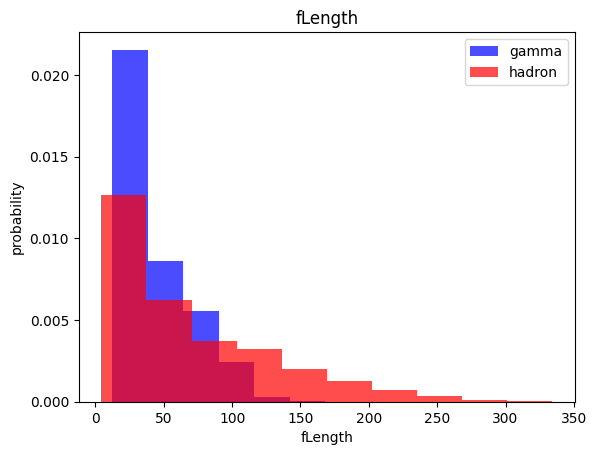

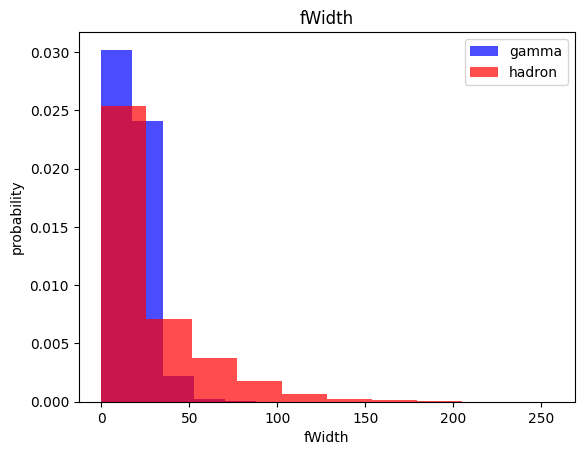

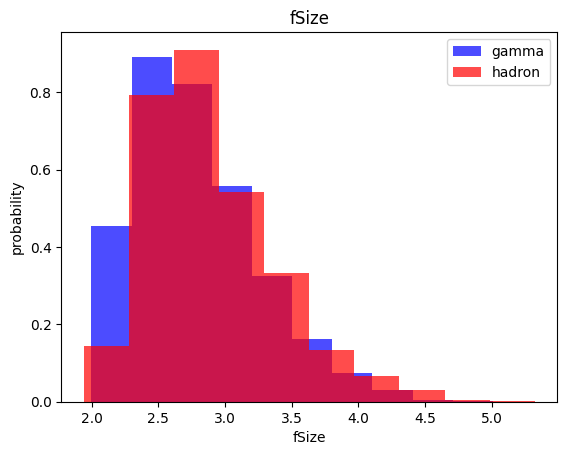

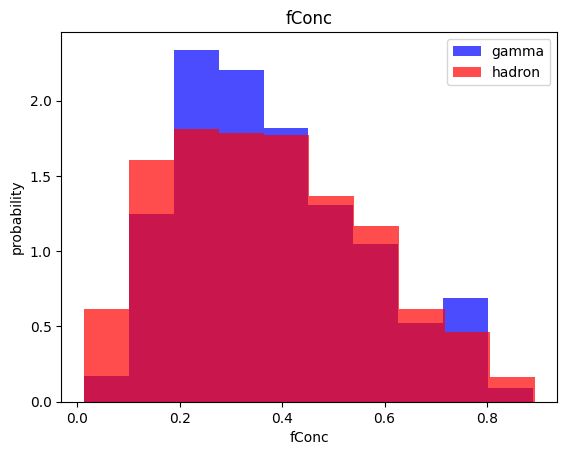

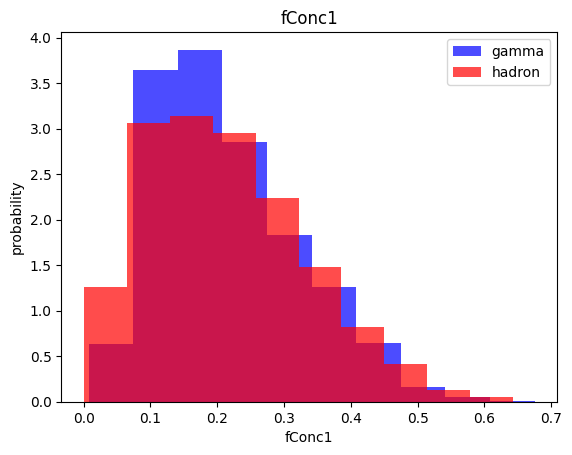

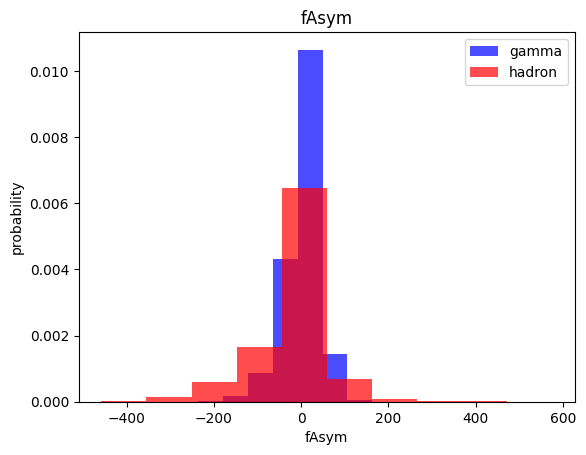

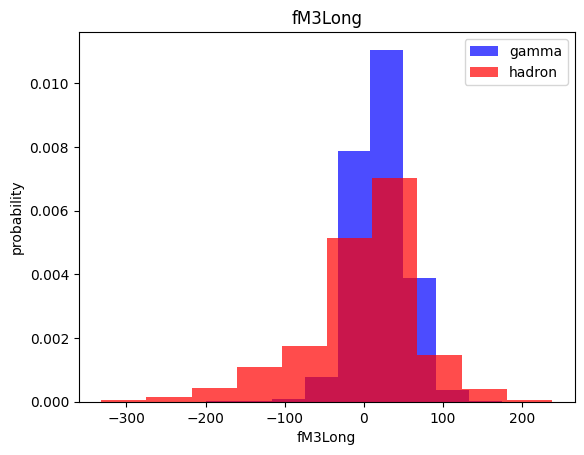

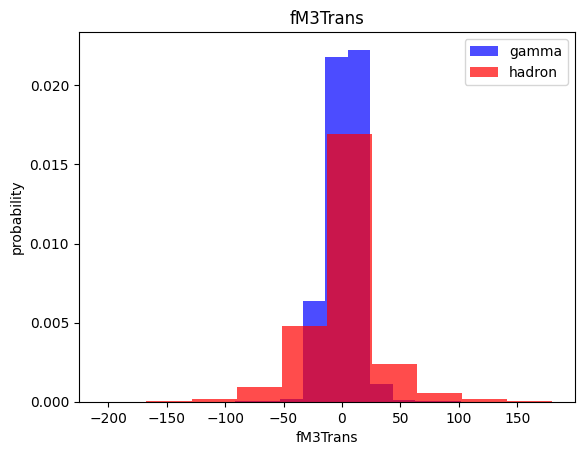

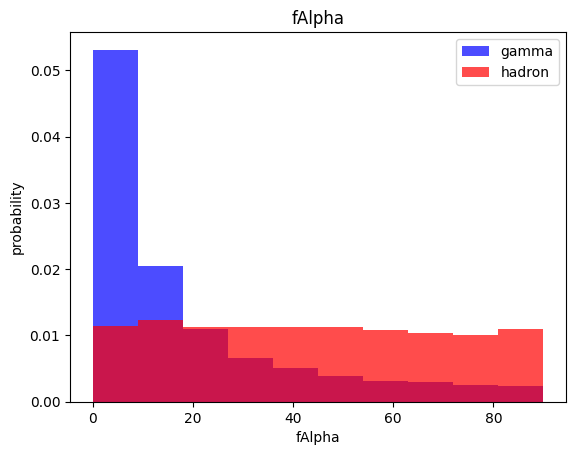

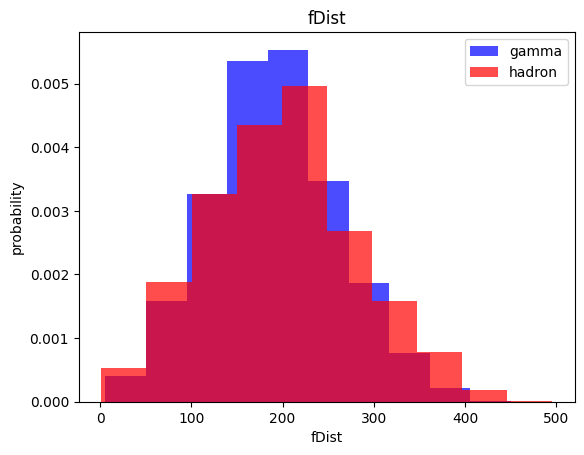

In [43]:
for feature in cols[:-1]:
  plt.hist(df[df["class"]==1][feature],color='blue', label='gamma', alpha = 0.7, density=True) #alpha is the transparency, density normalize the histogramm to allow comparison
  plt.hist(df[df["class"]==0][feature],color='red', label='hadron', alpha = 0.7, density=True)
  plt.title(feature)
  plt.ylabel("probability")
  plt.xlabel(feature)
  plt.legend()
  plt.show()

**Train,validation and test datasets**

In [44]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)),int(0.8*len(df))]) # Everything between 60% and 80% will go to the validation
#split divide array into subarray
#sample() method returns a specified number of random rows

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


As we can see in the the datasets the scale of these values is way of for example `fWidth` is in the hundreds while `fConc` is in the 0.001 and that can affect our results.
So we scale the values so it will be relatives to the mean and the standard deviation of these columns.

In [45]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values #get the values of everything except the last columns
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X) #take X and fit the standard scaler to X and transform those values  and what it would be


  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y) # take more of the less class and sample from there to increase the size of the dataset
  #make a 2-D numpy array
  data = np.hstack((X,np.reshape(y,(-1,1)))) #Stack horizontally 2 arrays not one above each other
  # the -1,1 makes it a 2-D array and the -1 infers the dimention of what it should have been so
  return data, X,y

In [46]:
train

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
14914  128.8696  24.8825  2.7363  0.3673  0.2243 -107.5256 -116.4463   
17408   42.0829  11.5649  2.8660  0.3921  0.2457   16.5901   36.3378   
6270   103.6410  25.5476  3.1057  0.1944  0.1031 -170.9680   57.2744   
8165    69.1062  26.4615  3.0156  0.1495  0.0767  -13.7770  -23.6209   
15467   13.8441   8.4785  2.3971  0.8778  0.5230  -12.6600   -9.1840   
...         ...      ...     ...     ...     ...       ...       ...   
7162    22.3454   6.5675  2.2636  0.7411  0.3896   25.0212    9.1562   
15812   60.2053  31.5846  3.2004  0.1280  0.0659   41.3833  -39.5387   
4035    27.6421  13.9434  2.4843  0.3574  0.1787   45.8372  -20.5492   
9288    31.0843   6.1756  2.3979  0.5800  0.3140   37.7332   13.6314   
18847   41.8902  19.1267  2.9120  0.3491  0.1929   58.3412   -9.5757   

       fM3Trans   fAlpha     fDist  class  
14914  -17.6881  45.9951  254.3935      0  
17408   -8.4510  18.5390  239.7520      0  
6270   -14.6201   1.0959  314.0570      1  
8165    17.6167   9.7830  172.1230      1  
15467   11.1124  20.5565  118.0750      0  
...         ...      ...       ...    ...  
7162     6.7759  11.9354  131.5320      1  
15812  -24.6757  59.3859  146.9280      0  
4035     5.0304  11.5031  205.4120      1  
9288    -2.1975  28.5490  150.6050      1  
18847    9.5459  42.6890  168.7320      0  

[11412 rows x 11 columns]

In [47]:
print(len(train[train["class"]==1])) # number of gamma 7436 before over sample
print(len(train[train["class"]==0])) #number of hadron 3976 before over sample

7369
4043


As you can see there's a lot more gamma than hadrons and that can cause a problem in detecting hadrons. So we want to oversample our training dataset. So we want to increase the number of the values where `["class"] == 0`

In [48]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [49]:
len(y_train)

14738

In [50]:
sum(y_train== 0) #the  over sample is successful

np.int64(7369)

In [51]:
sum(y_train== 1)

np.int64(7369)

In [52]:
#train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

Now our data is properly formatted, we're going on to different models.

# K-nearest neighbors

Data has samples so you can do a **classification**, here it's binary.
Here we're using the euclidian distance : sqrt((x1 - x2)**2 + (y1 - y2)**2)

Usully we use k = 3 or 5.

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Prediction

In [55]:
y_pred = knn_model.predict(X_test)

In [56]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [57]:
y_test

array([0, 1, 0, ..., 0, 1, 1])

As we can see there's some erreur with the y predicted and the y test.

Let's look at the classifier report given by sklearn

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1308
           1       0.86      0.84      0.85      2496

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Accuracy = 81% right /total dataset
precision says. Out of all the data from class 0 we have a 67 % recall and a 78 % precision.
The f1 score is a mix of precision and recall and we will focus on this because we have an unbalanced test dataset.

Precision is out of the label that we have labelled as positive hom many are truly positive. Recall is out of all the data that are truly positive how many are actually positive.

# Naive Bayes
Using probability (given that)

## **Bayes rule**
**$$P(A|B) = (P(B|A).\frac{P(A))}{P(B)}$$**

We adapt it for machine learning.
We have the different categories Ck and the feature vector x.

$$P(Ck|x) = (P(x|Ck). \frac{P(Ck))}{P(x)}$$

**Posterior = likelihood x prior / evidence**
**Posterior** : the probability that it is from this class (categorie)  with all the evidence (feature).

**Likelihood** : Assume that this is this class what is the likelihood of seeing this feature in this class

**Prior** : In the entire population of things what is the probability of this class in general

**Evidence** : We're changing the prior we're creating this new posterior probability built upon the prior using some sort of evidence = probability of the future

 $$P(Ck|x1,x2,...,xn) α  P(Ck) ∏ P(xi|Ck)$$
α : proportional to

=>
$$P(Ck|x1,x2,...,xn) = P(x1,x2,...,xn|Ck) x P(Ck)/P(x1,...,xn)$$

And because P(x1,..,xn) doesn't depend on the category, we can say that :     
$$P(Ck,x1,x2,...,xn) α P(x1,x2,...,xn|Ck) x P(Ck)$$

In Naive Bayes we assume that all the features are independant , so we can write:
$$P(x1,x2,...,xn|Ck) = P(x1|Ck) x P(x2|Ck) x... x P(xn|Ck)$$

So $$P(Ck,x1,x2,...,xn) α P(x1|Ck) x P(x2|Ck) x... x P(xn|Ck) x P(Ck) $$ ==> gives the formula in **bold**.


$$ŷ = predicted y = argmax (k = 1,...,n) { P(Ck|x1,x2,...,xn)} = argmax (k = 1,...,n) {P(Ck) ∏ P(xi|Ck)}$$

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nb_model = GaussianNB()
nm_model = nb_model.fit(X_train, y_train)

In [62]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1308
           1       0.74      0.90      0.81      2496

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



Accuracy is 72% but not good.

# Linear Regression
Not classification, so we have a model ŷ = mx + b but we want to model the probability of it being a hadron p = mx + b . But the problem is that in the regression it goes form minus infinity to infinity. So that's why instead of modeling a probability we model a ratio : $$\frac{p}{1-p} = mx + b$$ (it takes infinity values). But mx +b can still be negative and not the ratio. That's why we take the ln(p/(1-p) = mx + b, which you can remove by taking the exp.

$$e^{ln(\frac{p}{1-p})} = e^{mx + b}$$

$$p = (1 - p).e^{mx + b}$$
$$p = e^{mx +b}-p.e^{mx+b}$$

$$p.(1 + e^{mx+b}) = e^{mx +b}$$

$$p = \frac{e^{mx +b}}{(1 + e^{mx +b})}$$

But I want a 1 on top of the fraction so we multiply by exp(-(mx+b)) which will give me a sigmoid function.

$$ p = \frac{e^{mx +b}}{1 + e^{mx +b}} .\frac{e^{-(mx +b)}}{e^{-(mx +b))}}$$
Which gives:
$$ p = \frac{1}{1 + e^{-(mx+b)}} $$
Pretty similar to a sigmoid function:

$$ S(y) = \frac{1}{1+e^{⁻y}}$$ that has its value between 0 and 1. And fit our data a lot better. (See image of the course).

That works if we only have one feature : **simple logistic regression**

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logistic_regression_model = LogisticRegression()
logistic_regression_model = logistic_regression_model.fit(X_train, y_train)

In [65]:
y_pred = logistic_regression_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1308
           1       0.85      0.82      0.83      2496

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Perform better than Naive Bayes but still worse than KNN.

# Support Vector Machines (SVM)
Find the hyperplane that best seperate the classes. For example, we have 2 types of data on a map, the SVM's goal is to find the line that best seperate the 2 different classes, but not only that, but we want the line with the best margin.

The data points that lie on the margin help defines the divider = **support vectors**

One of the issues with SVM is that it is not robust with ouliers (valeur aberrante). It will completely change the position of the divider, even if there's only one.

There isn't usually two divider in a SVM, to have only 1 divider, we use projection (application d'une fonction (carré par exemple)) that's called the **kernel trick**

In [66]:
from sklearn.svm import SVC

In [67]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [68]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1308
           1       0.90      0.89      0.89      2496

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



All in all these 4 methods have an accuracy of 70% to 80% with SVM being the best. Lets see if a neural network can do better.

# Neural Network
A neural network is a linear sum with an activation function (sigmoid, tanh, relu...)


If look at the loss function L2 which is here is a quadratic function. We use the gradient descent to go down the slope. The value of the descent is different according to the weights w0, w1, w2.


We want to calculate a new weight w0. we use its old value plus the learning rate alpha time the slope vector. That's how the backpropagation works.

## Neural Net

In [69]:
import tensorflow as tf


In [72]:
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # just 1 node for the input
    #and because it's a sigmoid activation function  it's basically a projection
    #giving either 0 or 1
    ])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy', metrics=['accuracy']) #the metric already considers the loss



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
def plot_history(history):
  fig, (ax1,ax2) = plt.subplots(1,2) #1 row and 2 columns
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_title('Plot History: Model Loss')
  ax1.set_ylabel('Binary crossentropy')
  ax1.set_xlabel('Epoch')
  ax1.legend()
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_title('Plot History: Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend()
  ax2.grid(True)
  plt.show

In [90]:
history = nn_model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2,verbose= 0)#validation_split leaves 20% to test
#An epoch is a full iteration over samples. The number of epochs is how many times the algorithm is going to run.

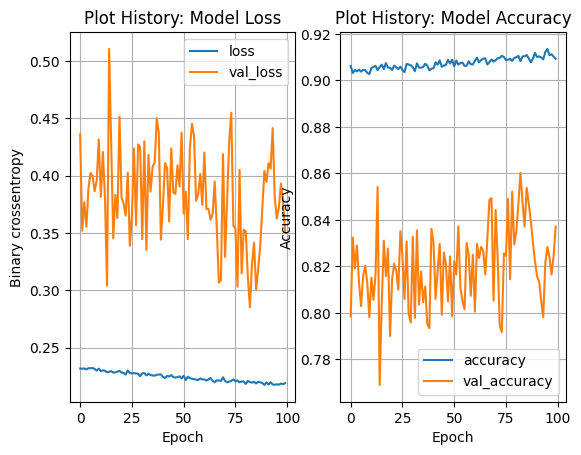

In [94]:
plot_history(history)

Decrease in loss and increase in accuracy. It is expected that the validation loss and accuracy is worse than the training accuracy and loss because the model is training on them instead of the testing data.

Lot of parameters affect the NN like the number of nodes, learning rate, batch size, so we can do a grid search (search according to the parameters of the NN)

In [83]:

def train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
  nn_model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob), #dropout randomly choose certain nodes and don't train on them to avoid overfitting
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid') # just 1 node for the input
      #and because it's a sigmoid activation function  it's basically a projection
      #giving either 0 or 1
      ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss = 'binary_crossentropy', metrics=['accuracy']) #the metric already considers the loss

  history = nn_model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2,verbose= 0)#validation_split leaves 20% to test
  return nn_model, history


16 nodes, dropout probability : 0, learning rate : 0.01, batch size : 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8706 - loss: 0.3220
16 nodes, dropout probability : 0, learning rate : 0.01, batch size : 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3441
16 nodes, dropout probability : 0, learning rate : 0.01, batch size : 128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3384
16 nodes, dropout probability : 0, learning rate : 0.005, batch size : 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.3303
16 nodes, dropout probability : 0, learning rate : 0.005, batch size : 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8746 - loss: 0.3233
16 nodes, dropout probability : 0, learning rate : 0.005, batch size : 128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.3117
16 nodes, dropout probability : 0, learning rate : 0.001, batch size : 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3270
16 nodes, dropout probability :

/tmp/ipython-input-3064895326.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1,ax2) = plt.subplots(1,2) #1 row and 2 columns


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8719 - loss: 0.3597
32 nodes, dropout probability : 0, learning rate : 0.005, batch size : 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8589 - loss: 0.4196
32 nodes, dropout probability : 0, learning rate : 0.005, batch size : 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3596
32 nodes, dropout probability : 0, learning rate : 0.005, batch size : 128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8580 - loss: 0.3458
32 nodes, dropout probability : 0, learning rate : 0.001, batch size : 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.3329
32 nodes, dropout probability : 0, learning rate : 0.001, batch size : 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8722 - loss: 0.3147
32 nodes, dropout probability : 0, learning rate : 0.001, batch size : 128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3291
32 nodes, dropout probability

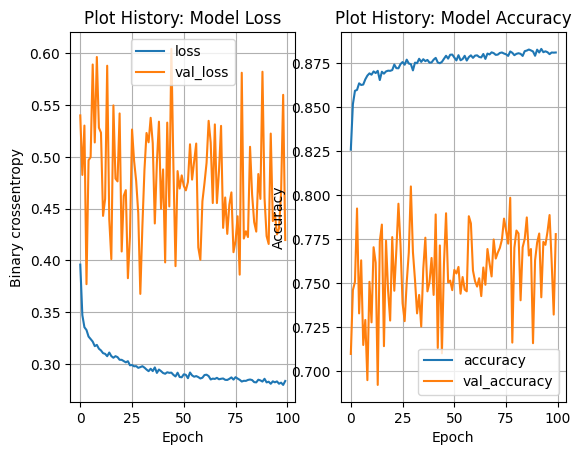

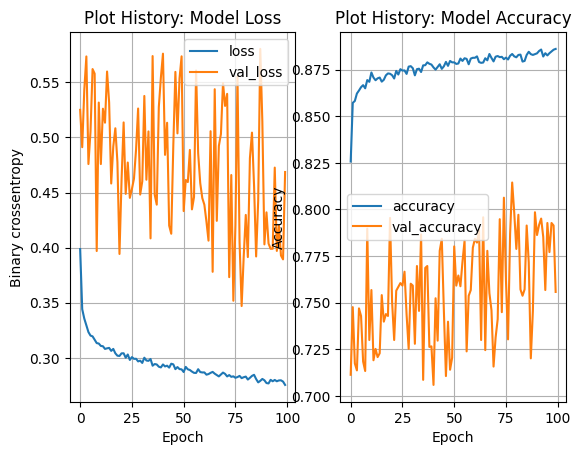

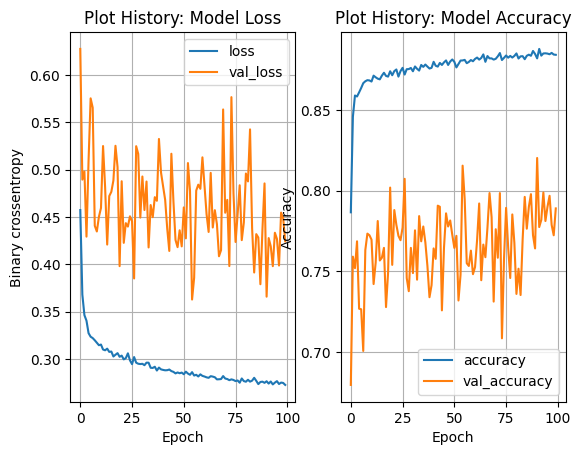

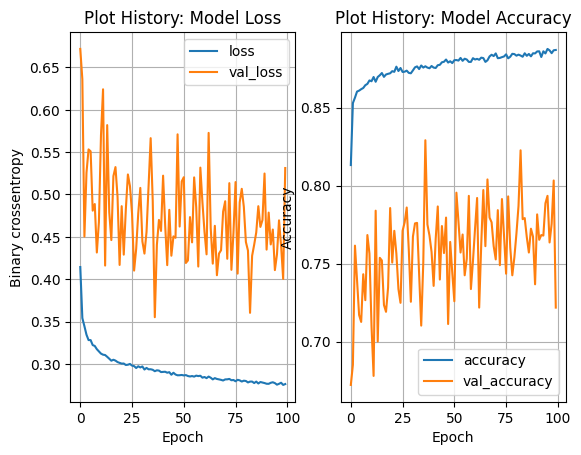

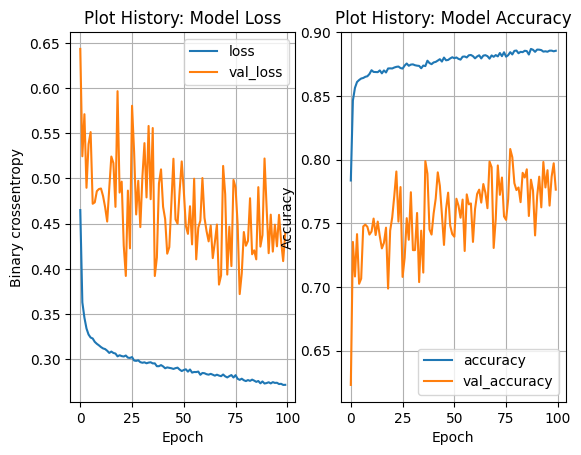

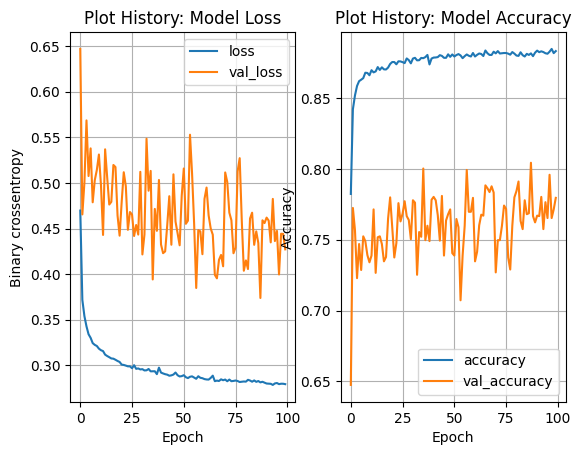

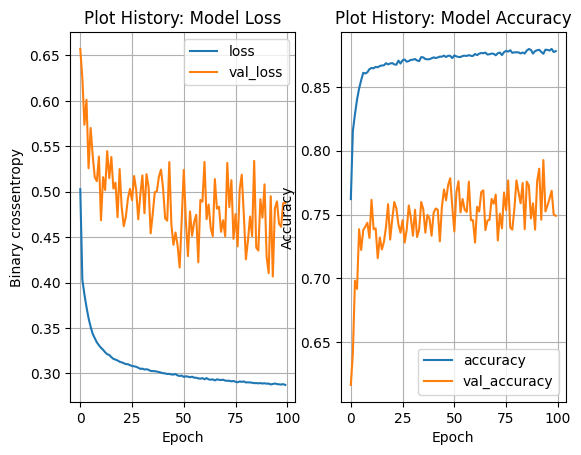

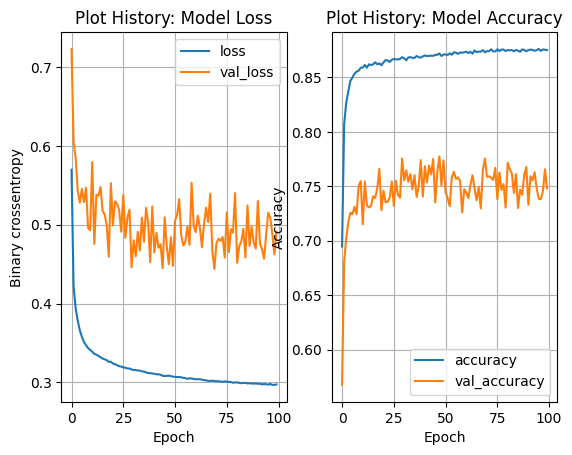

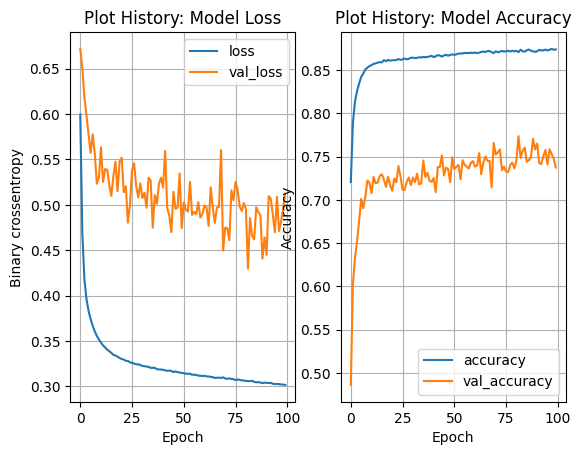

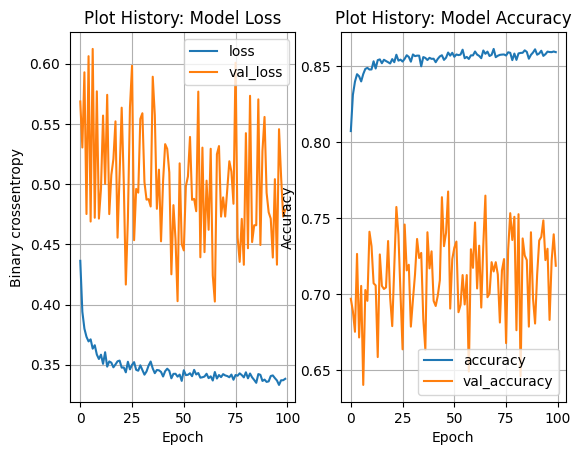

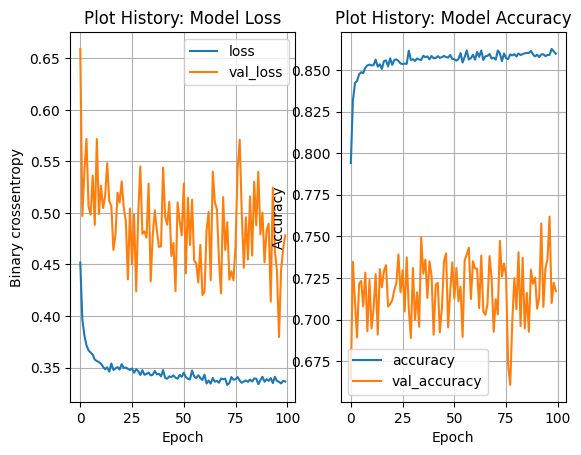

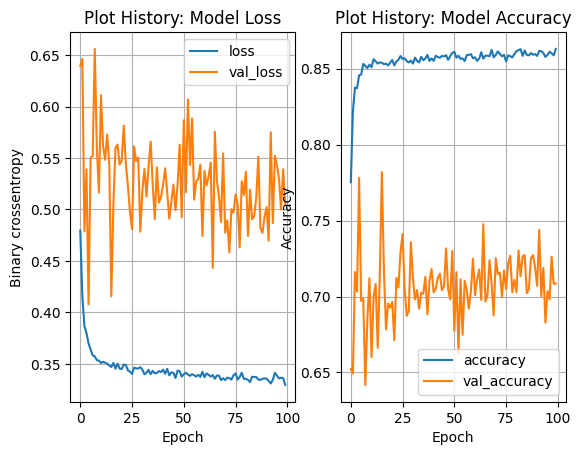

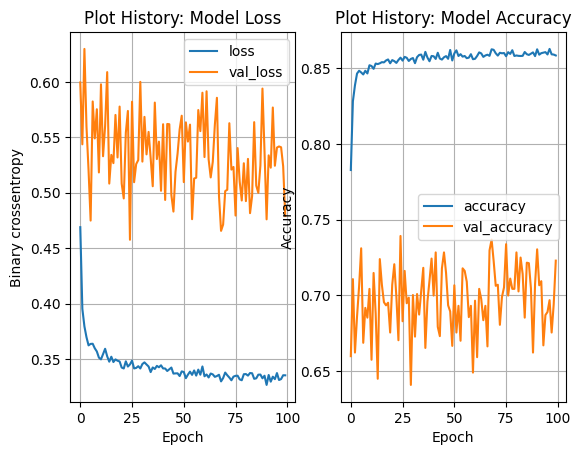

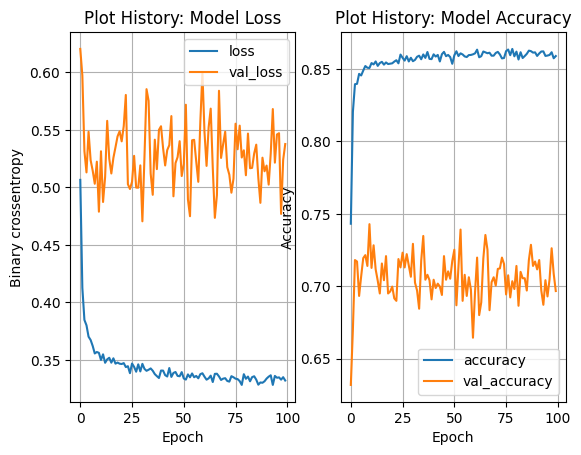

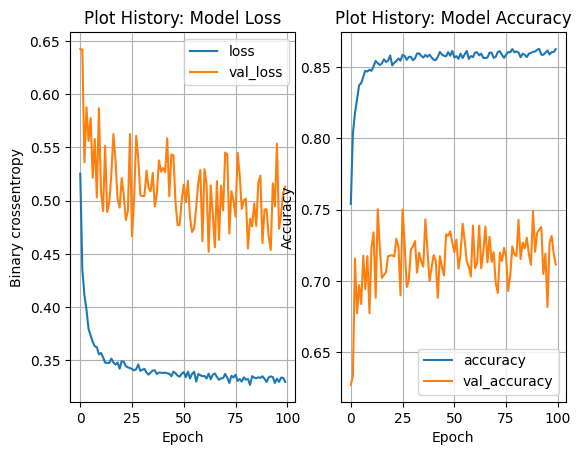

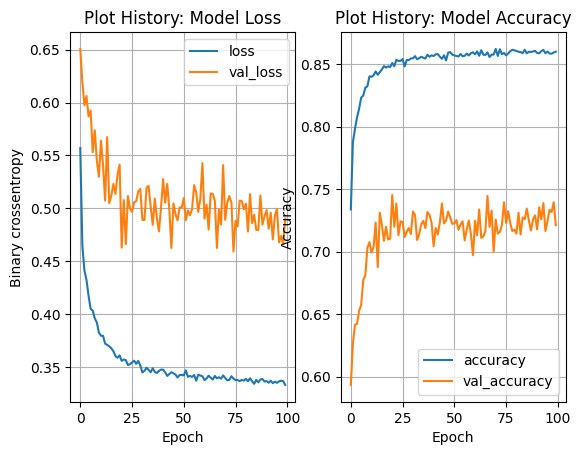

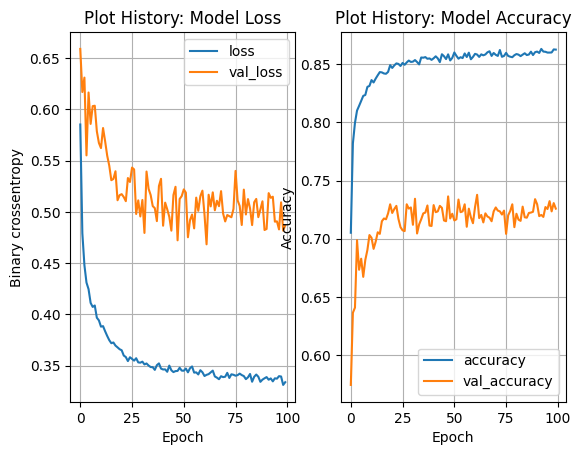

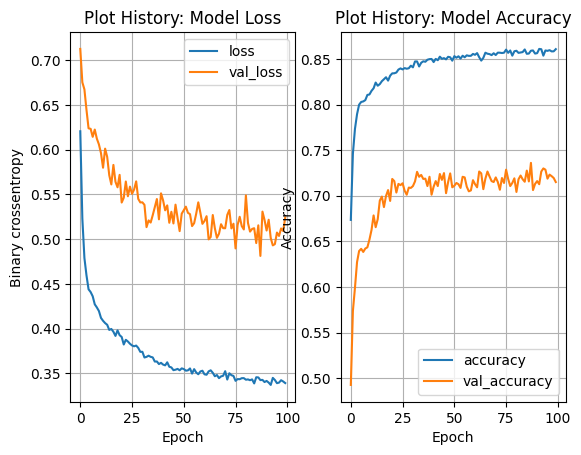

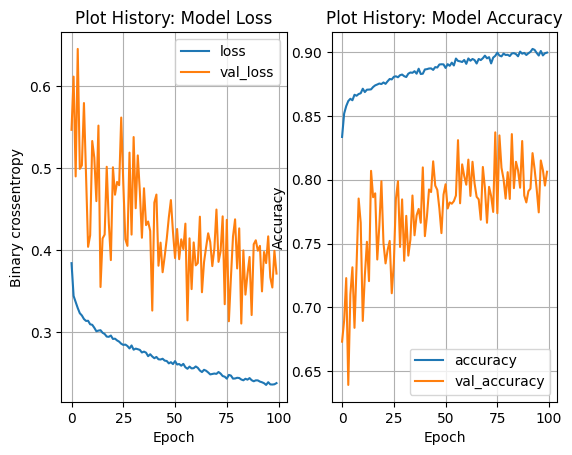

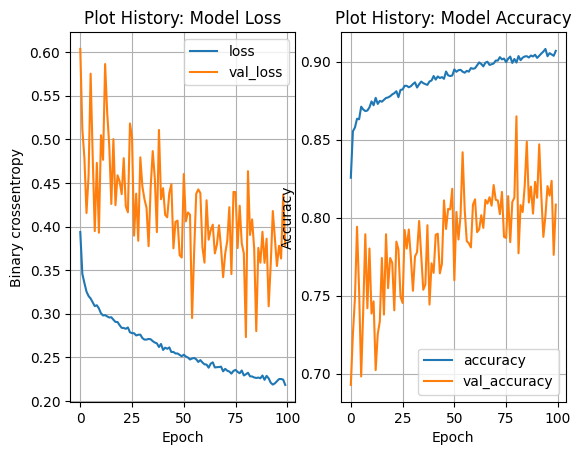

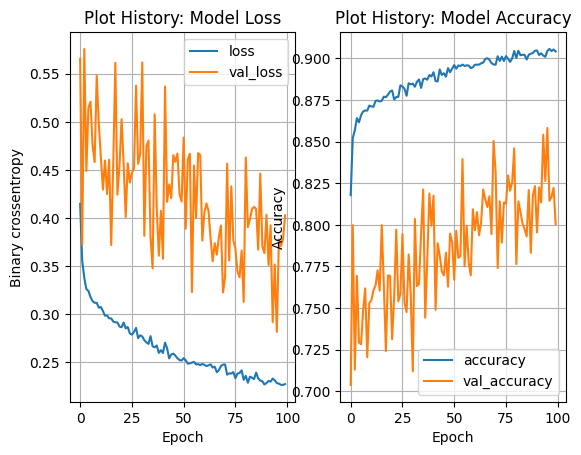

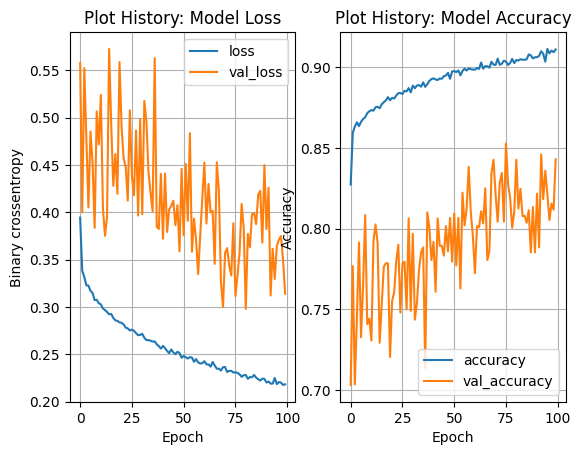

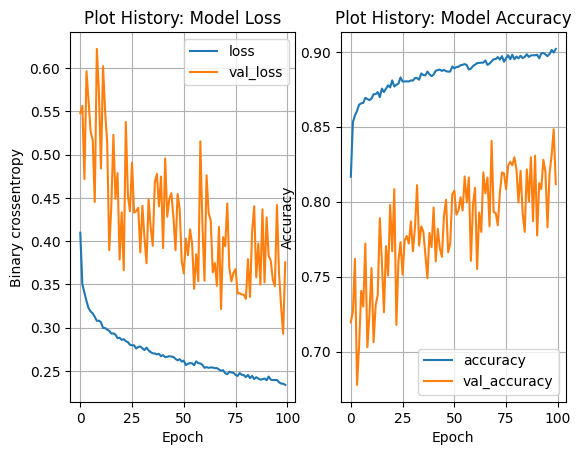

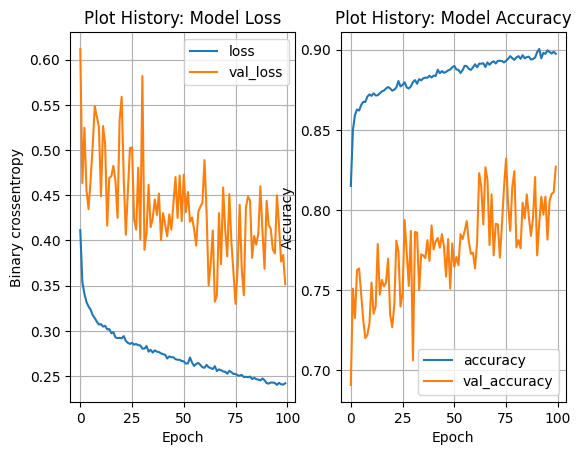

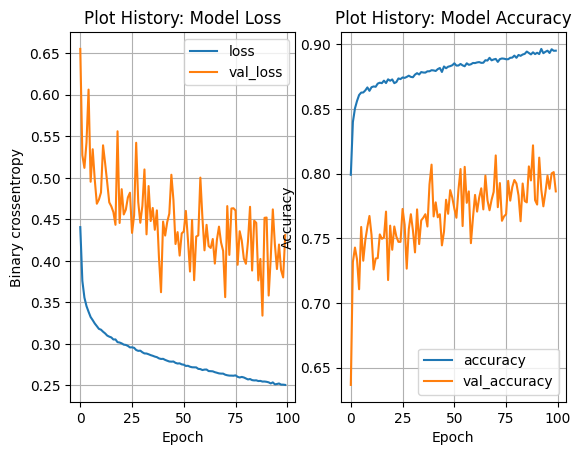

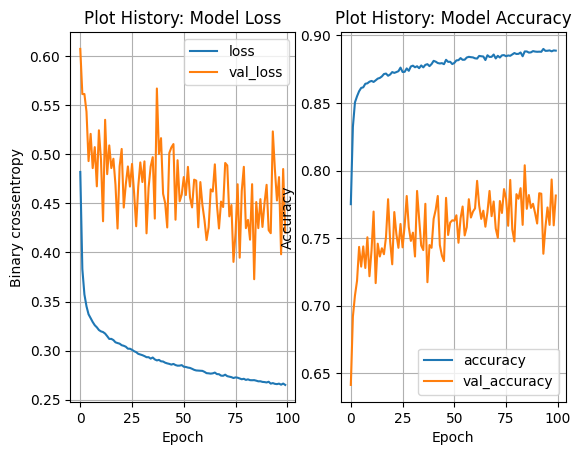

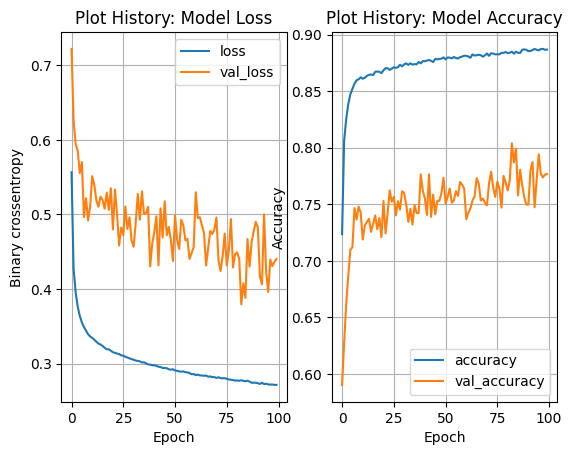

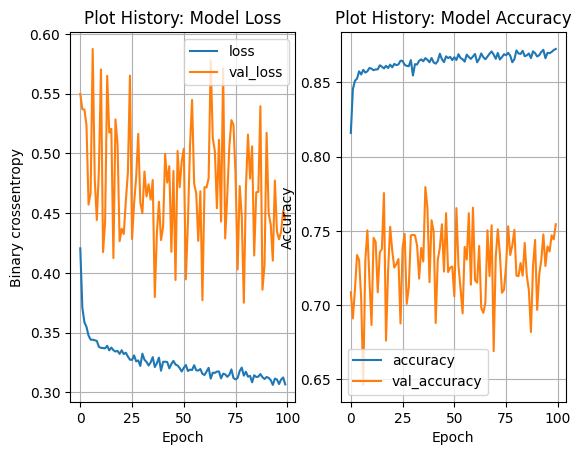

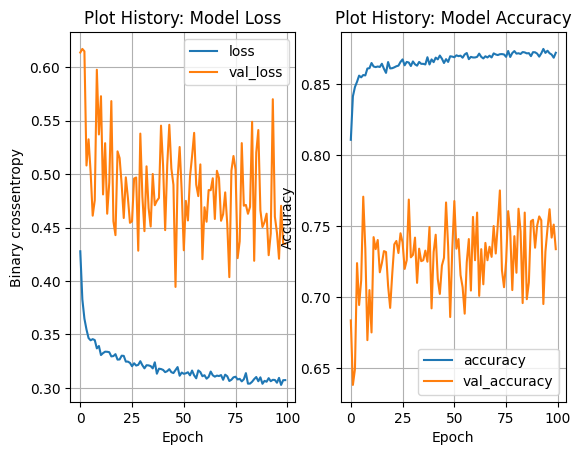

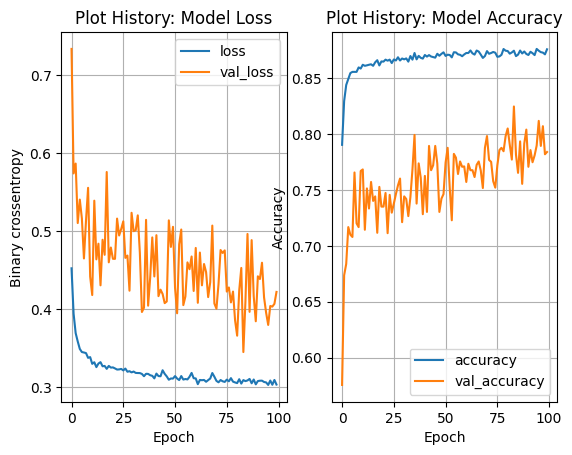

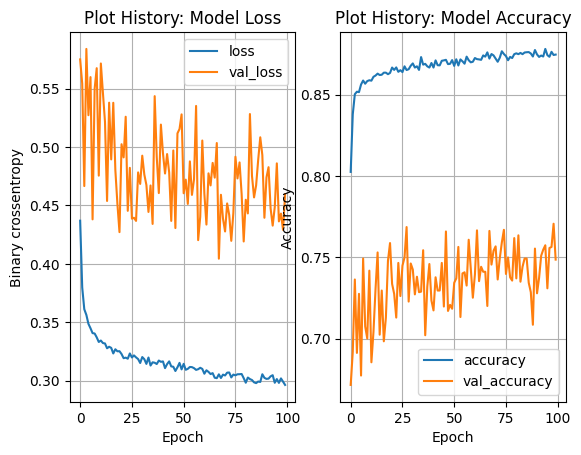

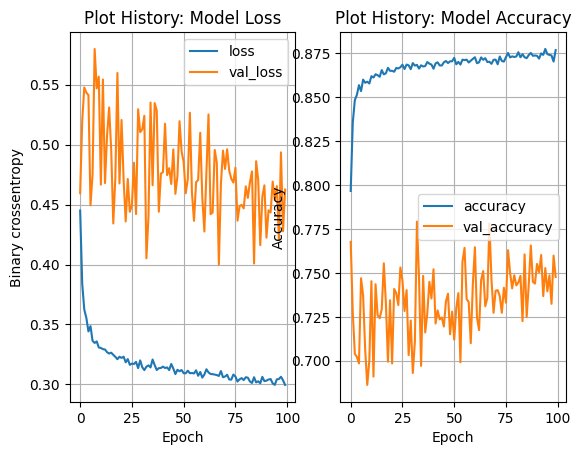

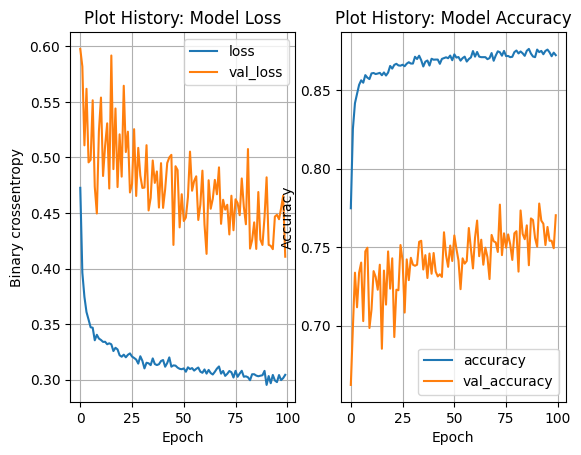

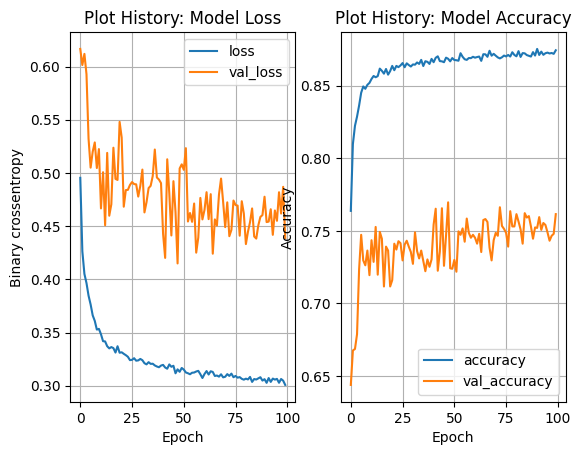

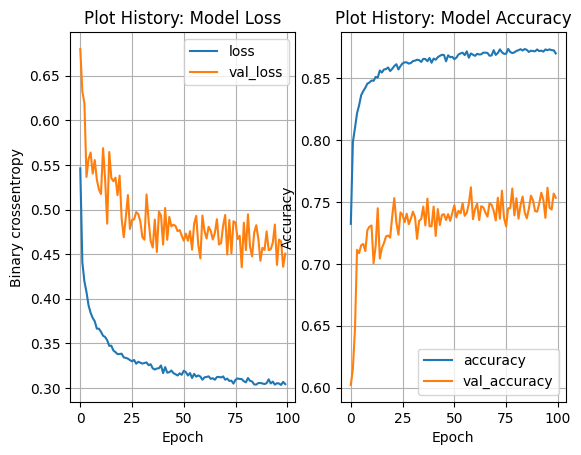

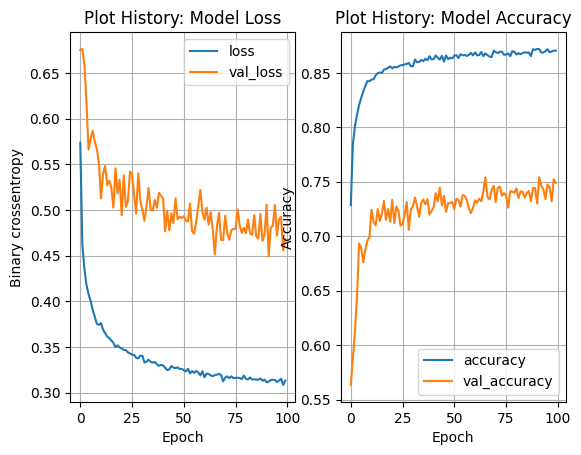

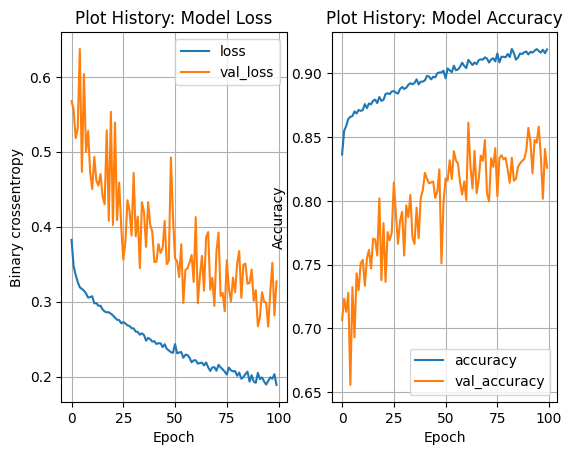

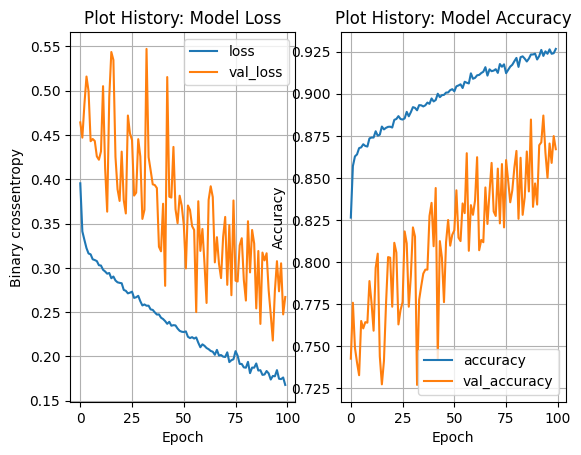

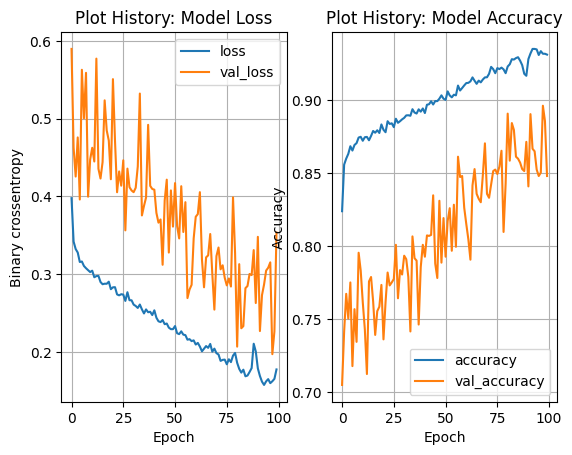

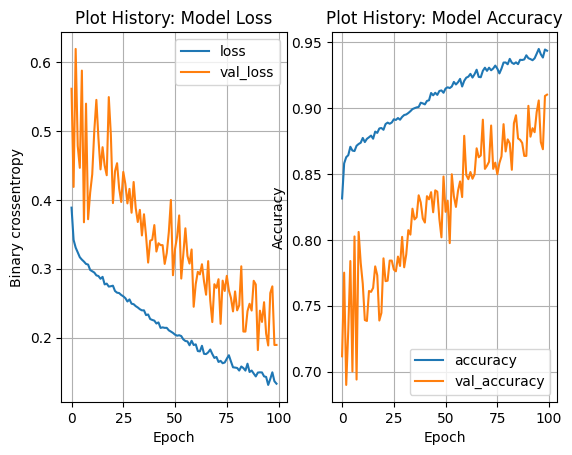

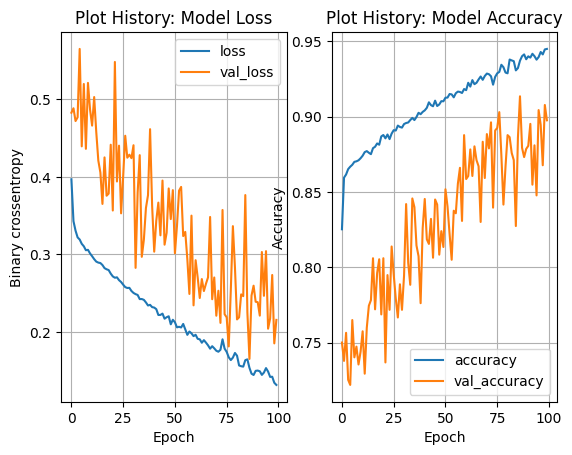

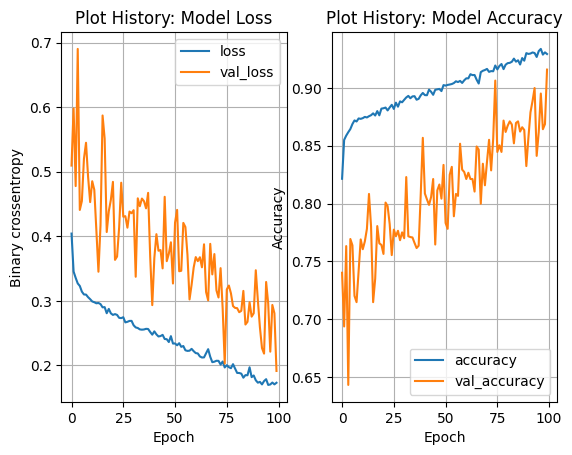

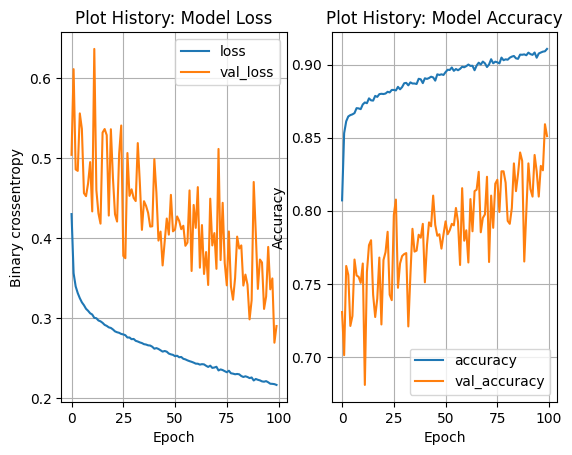

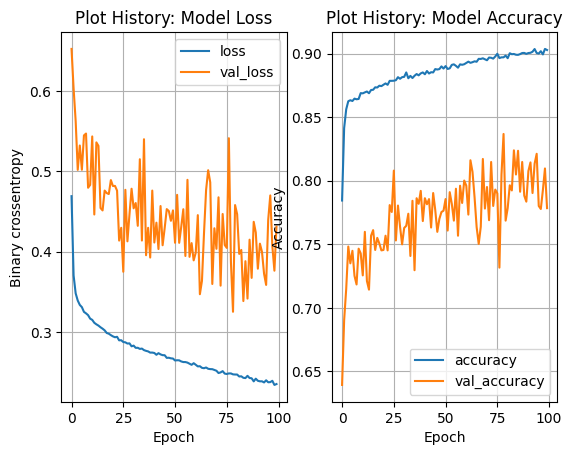

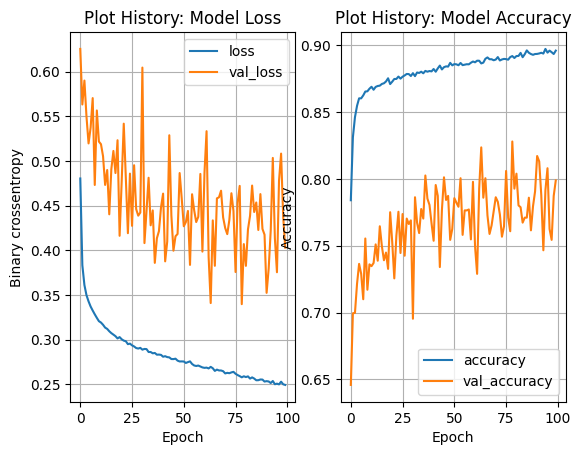

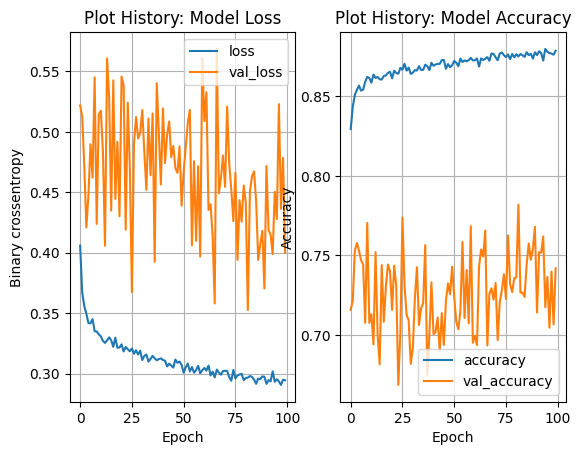

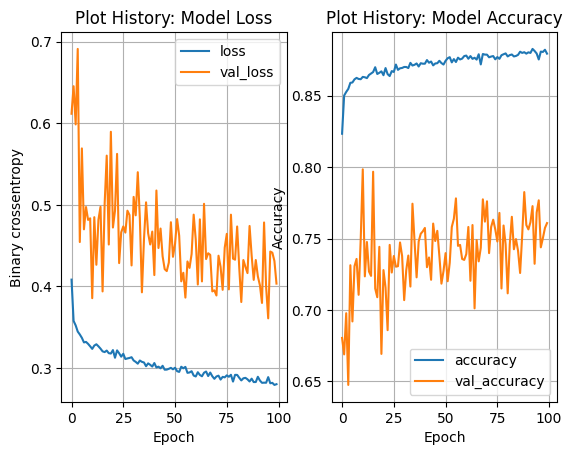

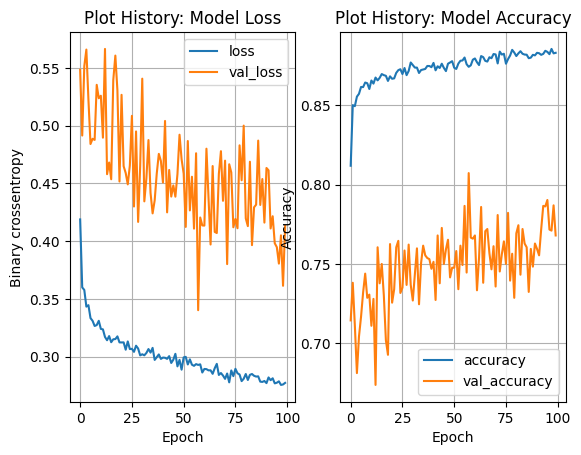

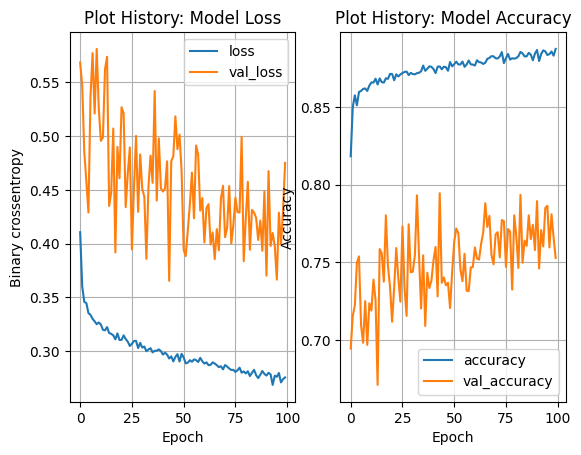

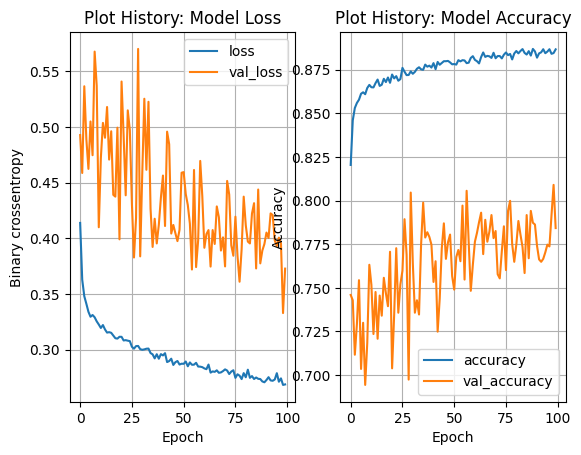

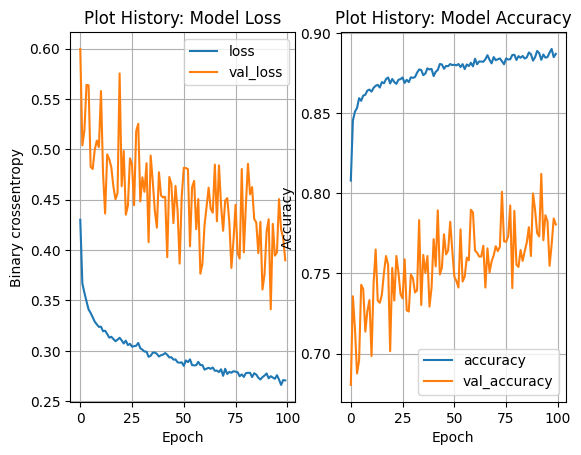

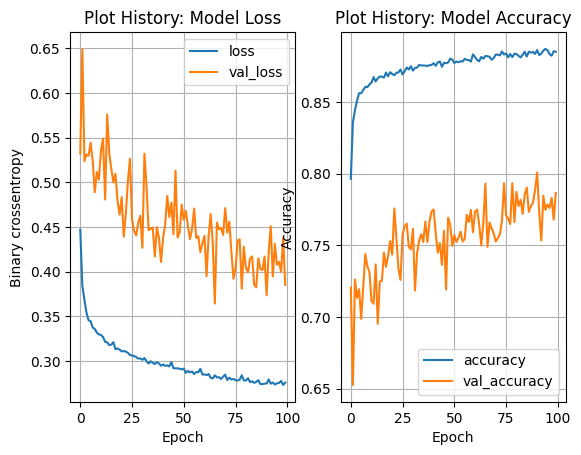

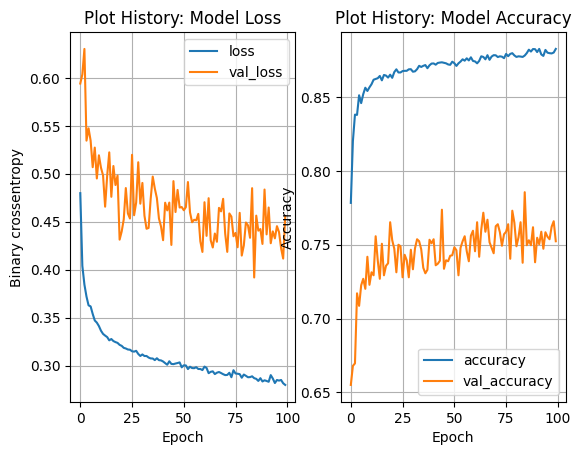

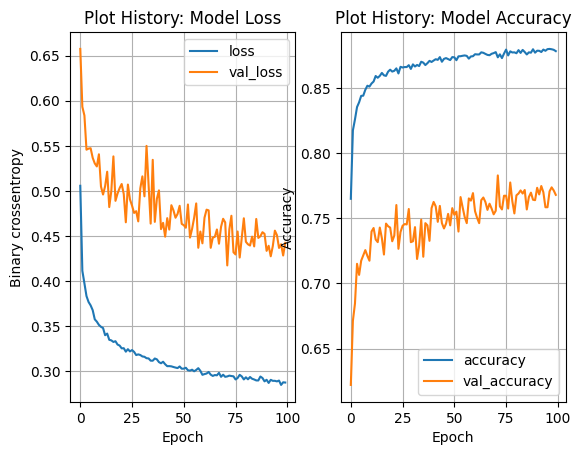

In [99]:
epochs = 100
# Try finding the model with the least loss
least_val_loss = float('inf')
least_loss_model = None
for num_nodes in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for learning_rate in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout probability : {dropout_prob}, learning rate : {learning_rate}, batch size : {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [103]:
y_pred = least_loss_model.predict(X_test) #Some value are really close to 0 and other really close to 1
#It's because the activiation function is a sigmoid


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[6.0105808e-02],
       [9.7699189e-01],
       [1.3140415e-01],
       ...,
       [1.5119756e-04],
       [9.8616326e-01],
       [9.9404949e-01]], dtype=float32)

 Some value are really close to 0 and other really close to 1. It's because the activiation function is a sigmoid. So we're going to cast it to either 1 or 0.

In [104]:
y_pred = (y_pred> 0.5).astype(int).reshape(-1, ) # astype of pandas convert a dataframe of one or many column
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1308
           1       0.89      0.93      0.91      2496

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



The precision on the hadron increased a bit but the recall decreased.
But the F1 is pretty good at like 0.80.
For the gamma the precision decreased but the recall increased. But the F1 really increased at 0.91.

The whole point of this exercice is how you can define your model and also neural network are powerful but sometime another model like SVM can also be appropriate

# Linear Regression
The other supervised learning with classification.

We have a bunch data points scattered across a plot. We have the x and y (which is now our label). Our goal is to find the line that best fit, that best model our data.


In regression, given certain features we're trying to predict some continuous numerical value for y.
In linear regression, we take our data and fit a linear model to this data. We want to find our line that best fit.

$$ y = b_0 + b_1.x$$ with $b_{\text{1}}$ being the slope

Let's introduce the **residual/error** to see how far off is the prediction ŷ (being the line ). The residual is the difference between the actual value and the prediction.

The residual is : $$ |y_i - ŷ_i|$$
So we do the sum of all the residual and find the line that best minimize this sum i.e find the best $b_{0}$ and $b_{1}$.


**Sum squared residuals** :
$$ \sum_{i=1}^n |y_i - ŷ_i|² $$

**Simple linear regression**: $ y = b_0 + b_1.x$

**Multiple linear regression**: $ y = b_{0} + b_{1}.x_{1} + b_{2}.x_{2}+ ... + b_{n}.x_{n}$

Assumptions :
- **linearity** : Does my data follow a linear pattern (does y increase/decrease at **constant rate** as x increase)
- **independency** : a point $(x_{1},y_{1})$ doesn't influence $(x_{2},y_{2})$, all sample should be independent
- **normality**
- **homoskedasticity**

For normality and homoskedasticity, we shoul look at the residual plot. This plot just represent how the data is distributed around the line. **Normality** means that the residuals should have a normal distribution.
**Homoskedasticity** means that the variance of this points should be constant throughout the points. The spread should remain constant.